In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

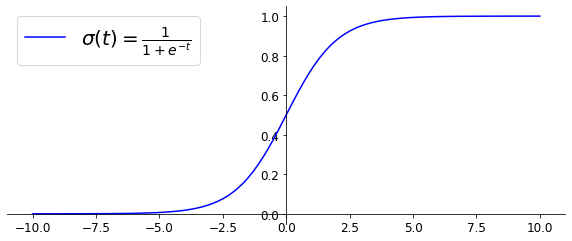

In [2]:
X = np.linspace(-10,10,100).reshape(100,1)
y = 1/(1+np.exp(-X))
plt.figure(figsize=(10,4))
# 去掉边框
ax = plt.gca()  # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none')  # 将右边 边沿线颜色设置为空 其实就相当于抹掉这条边
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 
## 设置中心的为（0，0）的坐标轴
ax.spines['bottom'].set_position(('data', 0))  # 指定 data 设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))

plt.plot(X,y,'b-' ,label=r'$\sigma(t)= \frac{1}{1+e^{-t}}$')
plt.legend(fontsize=20)

### 逻辑回归
<img src='img/303.jpg'>
<img src='img/301.jpg'>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
# 查看iris里面有多少属性
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 将一个多分类问题,拆分成多个二分类进行解决

In [7]:
import numpy as np
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int32)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
np.array([[1]])

array([[1]])

In [9]:
np.ones([1,1])

array([[1.]])

In [10]:
for i in range(1,0,-1):
    print(i)

1


In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)


LogisticRegression(random_state=42)

In [7]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [8]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [9]:
# 获取决策边界的位置
decision_boundary = X_new[y_proba[:,1]>=0.5][0]
decision_boundary

array([1.66066066])

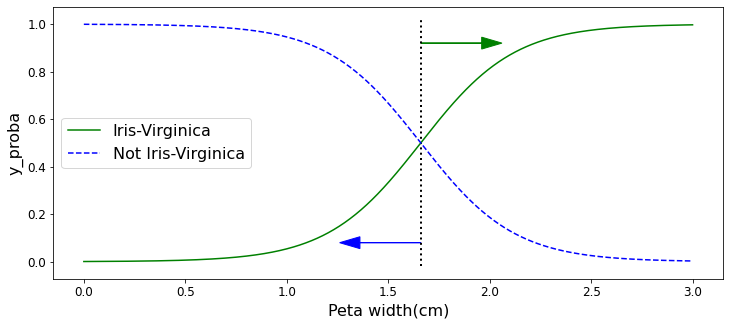

In [10]:
plt.figure(figsize=(12,5))
# 画一条决策边界
plt.plot([decision_boundary,decision_boundary],[-0.02,1.02],'k:',linewidth=2)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g',ec='g')
plt.xlabel('Peta width(cm)', fontsize=16)
plt.ylabel('y_proba', fontsize=16)
plt.legend(loc='center left', fontsize=16)

In [11]:
# 查看一个方法的定义
print(help(plt.arrow))

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the Axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.
    
    dx, dy : float
        The length of the arrow along x and y direction.
    
    width : float, default: 0.001
        Width of full arrow tail.
    
    length_includes_head : bool, default: False
        True if head is to be counted in calculating the length.
    
    head_width : float or None, default: 3*width
        Total width of the full arrow head.
    
    head_length : float or None, default: 1.5*head_width
        Length of arrow head.
    
    shape : {'full', 'left', 'right'}, default: 'full'
        Draw the left-half, right-half, or full arrow.
    
    overhang : float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shape). Can be negat

### 画决策边界

In [12]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression()

In [15]:
X[:,0].min(),X[:,0].max()

(1.0, 6.9)

In [16]:
X[:,1].min(),X[:,1].max()

(0.1, 2.5)

### 决策边界的绘制: 
- 构建坐标数据, 合理的范围当中, 根据实际训练时输入数据来决定
- 整合坐标点, 得到所有测试输入数据坐标点
- 预测, 得到所有点的概率值
- 绘制等高线, 完成决策边界

#### 构建坐标数据: 

In [17]:
np.linspace(1,2,2).reshape(-1,1)

array([[1.],
       [2.]])

#### 坐标的棋盘制作

In [1]:
x0,x1 = np.meshgrid(np.linspace(1,2,2).reshape(-1,1),np.linspace(10,20,3).reshape(-1,1))

NameError: name 'np' is not defined

In [38]:
x0

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [20]:
x1

array([[10., 10.],
       [15., 15.],
       [20., 20.]])

In [21]:
np.c_[x0.ravel(),x1.ravel()]

array([[ 1., 10.],
       [ 2., 10.],
       [ 1., 15.],
       [ 2., 15.],
       [ 1., 20.],
       [ 2., 20.]])

In [39]:
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))

In [40]:
X_new = np.c_[x0.ravel(),x1.ravel()]

In [41]:
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [25]:
# 500*200
X_new.shape

(100000, 2)

In [42]:
y_proba = log_reg.predict_proba(X_new)

(2.9, 7.0, 0.5, 3.0)

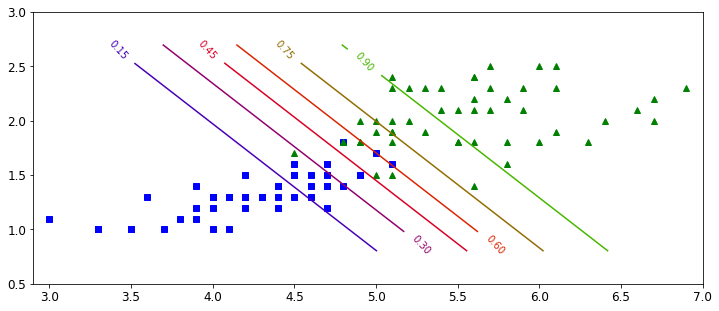

In [43]:
plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
# 画出等高线
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)
plt.clabel(contour,inline = 2)
plt.axis([2.9,7,0.5,3])

<img src='img/302.jpg'>

In [44]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [48]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [51]:
softmax_reg.predict([[5,2]])

array([2])

In [52]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

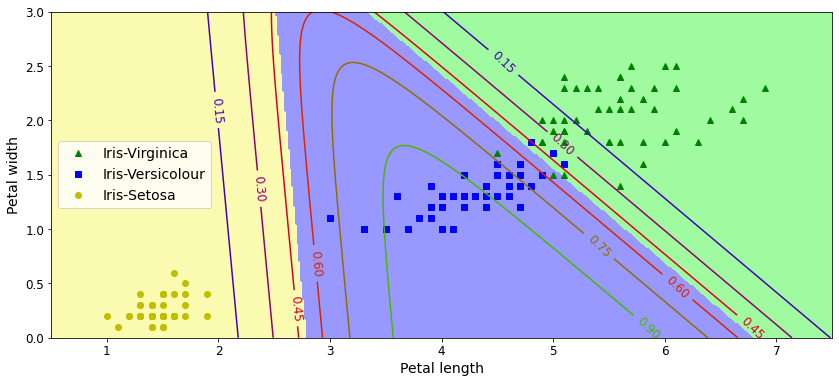

In [66]:
# 设置棋盘
x0, x1 = np.meshgrid(
                    np.linspace(0,8,500).reshape(-1,1),
                    np.linspace(0,3,200).reshape(-1,1)
                    )
X_new = np.c_[x0.ravel(),x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

"""
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
"""

plt.figure(figsize=(14,6))
plt.plot(X[y==2,0],X[y==2,1],'g^',label='Iris-Virginica')
plt.plot(X[y==1,0],X[y==1,1],'bs',label='Iris-Versicolour')
plt.plot(X[y==0,0],X[y==0,1],'yo',label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# 画出等高线
plt.contourf(x0,x1,zz , cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline = 2,fontsize=12)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0.5,7.5,0,3])
